In [0]:
import os

In [2]:
!ls '/content/drive/My Drive'

 all-data.csv			 Musical_instruments_reviews.csv
 amazon-music-reviews.zip	 p1.c
 Assignment1.ipynb		'Photo album.gslides'
'Colab Notebooks'		'PROJECT PROPOSAL.gdoc'
 denoising-dirty-documents.zip	'Resume (1).gdoc'
 FinancialPhraseBank		 Resume.gdoc
 glove.6B.100d.txt		 sentiment-analysis-for-financial-news.zip
 glove.6B.200d.txt		 SIGNICENT-converted.pdf
 glove.6B.300d.txt		'State Bank of India (1).pdf'
 glove.6B.50d.txt		'State Bank of India.pdf'
 glove.6B.zip			 test_ScVgIM0.zip
'Gyan era-converted.pdf'	'To-do list (1).gsheet'
'HS 202 PROJECT.gdoc'		'To-do list.gsheet'
 images_background		 train_LbELtWX.zip
 images_background.zip		'Untitled document (1).gdoc'
 images_evaluation.zip		'Untitled document (2).gdoc'
 Kaggle				'Untitled document (3).gdoc'
 Kaggle2			'Untitled document.gdoc'
 Musical_Instruments_5.json	 utkface-new.zip


In [0]:
!unzip '/content/drive/My Drive/denoising-dirty-documents.zip'

In [0]:
!unzip 'train.zip'

In [0]:
!unzip 'train_cleaned.zip'

In [6]:
!ls

autoencoder.png  sampleSubmission.csv.zip  train_cleaned
drive		 test.zip		   train_cleaned.zip
sample_data	 train			   train.zip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split

import keras
from keras import backend as K
from keras.layers import *
from keras.utils import np_utils
from keras import regularizers
from keras.regularizers import l2
from keras.models import Sequential,Model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [8]:
print(len(os.listdir('train')))
print(len(os.listdir('train_cleaned')))

144
144


Text(0.5, 1.0, 'and its cleaned version')

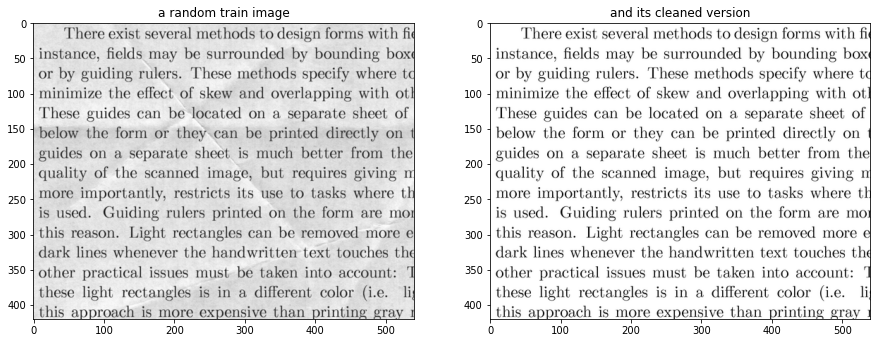

In [9]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
img=cv2.imread('train/'+os.listdir('train')[0])
plt.imshow(img)
plt.title('a random train image')
plt.subplot(1,2,2)
img1=cv2.imread('train_cleaned/'+os.listdir('train_cleaned')[0])
plt.imshow(img1)
plt.title('and it''s cleaned version')

In [10]:
img.shape

(420, 540, 3)

In [0]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array
X=[]
for i in range(len(os.listdir('train'))):
  img=load_img('train/'+os.listdir('train')[i],color_mode = "grayscale",target_size=(420,540))
  img=img_to_array(img)
  img=img.astype('float32')/255
  #img=cv2.resize(img,(420,540),interpolation = cv2.INTER_AREA)
  X.append(img)
Y=[]
for i in range(len(os.listdir('train_cleaned'))):
  img=load_img('train_cleaned/'+os.listdir('train_cleaned')[i],color_mode = "grayscale",target_size=(420,540))
  img=img_to_array(img)
  img=img.astype('float32')/255
  #img=cv2.resize(img,(420,540),interpolation = cv2.INTER_AREA)
  Y.append(img)

In [0]:
input_img = Input(shape=(420,540,1), name='image_input')
    
#enoder 
x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
x = MaxPooling2D((2,2), padding='same', name='pool1')(x)

#decoder
x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
x = UpSampling2D((2,2), name='upsample1')(x)
x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)

#model
autoencoder = Model(inputs=input_img, outputs=x)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 64)      640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 64)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 210, 270, 64)      36928     
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 420, 540, 64)      0         
_________________________________________________________________
Conv5 (Conv2D)               (None, 420, 540, 1)       577       
Total params: 38,145
Trainable params: 38,145
Non-trainable params: 0
_______________________________________________________

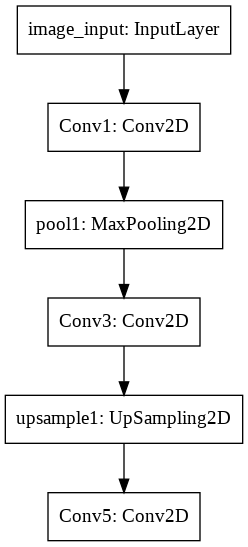

In [14]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder.png')

In [0]:
X=np.array(X)
Y=np.array(Y)
X.shape=(144,420,540,1)
Y.shape=(144,420,540,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [16]:
Y.shape

(144, 420, 540, 1)

In [17]:
X_train.shape

(115, 420, 540, 1)

In [18]:
history=autoencoder.fit(X_train, Y_train,
                epochs=100,
                batch_size=8,
                validation_data=(X_test, Y_test))

Train on 115 samples, validate on 29 samples
Epoch 1/100
115/115 [==============================] - 7s 58ms/step - loss: 0.4576 - val_loss: 0.3567
Epoch 2/100
115/115 [==============================] - 2s 17ms/step - loss: 0.3158 - val_loss: 0.2827
Epoch 3/100
115/115 [==============================] - 2s 17ms/step - loss: 0.2522 - val_loss: 0.2128
Epoch 4/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1881 - val_loss: 0.1685
Epoch 5/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1593 - val_loss: 0.1511
Epoch 6/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1458 - val_loss: 0.1409
Epoch 7/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1376 - val_loss: 0.1353
Epoch 8/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1325 - val_loss: 0.1285
Epoch 9/100
115/115 [==============================] - 2s 17ms/step - loss: 0.1279 - val_loss: 0.1246
Epoch 10/100
115/115 [===============

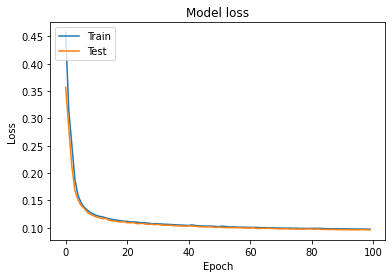

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Model Cleaned')

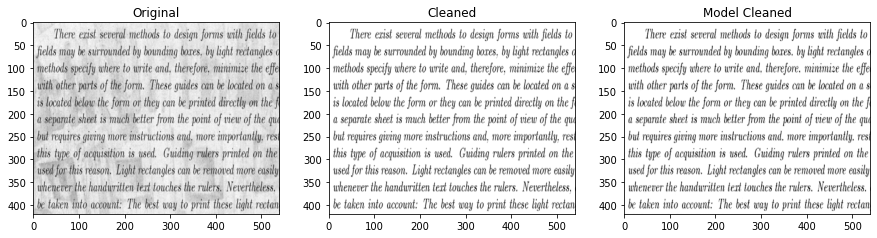

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
xx=X[1]
xx.shape=(420,540)
plt.imshow(xx,cmap='gray')
plt.title("Original")
plt.subplot(1,3,2)
yy=Y[1]
yy.shape=(420,540)
plt.imshow(yy,cmap='gray')
plt.title('Cleaned')
plt.subplot(1,3,3)
xx.shape=(1,420,540,1)
pred=autoencoder.predict(xx)
pred.shape=(420,540)
plt.imshow(pred,cmap='gray')
plt.title('Model Cleaned')